In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def display_image(title, image):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.axis('off')
    if len(image.shape) == 3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap='gray')
    plt.show()

In [9]:
# Load image using matplotlib
image_path = '/content/image1.jpg'  # Replace with the path to your image
image = cv2.imread(image_path)

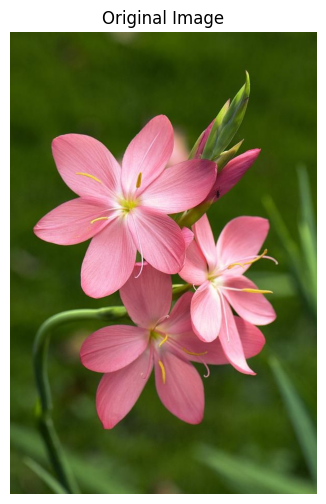

In [10]:
if image is None:
    print("Image not found. Please check the path and try again.")
else:
    display_image("Original Image", image)



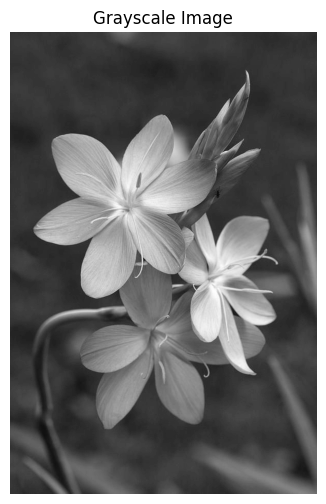

In [12]:
 # Convert the image to grayscale for processing
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display_image("Grayscale Image", gray_image)



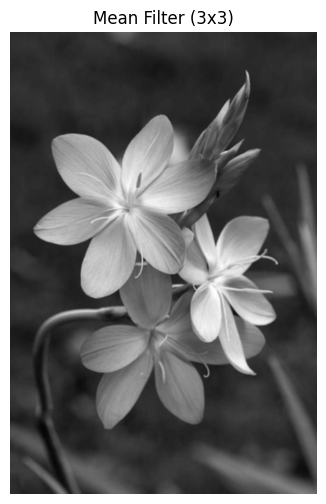

In [14]:
# Mean Filter (3x3)
mean_kernel = np.ones((3, 3)) / 9
mean_blur = cv2.filter2D(gray_image, -1, mean_kernel)
display_image("Mean Filter (3x3)", mean_blur)


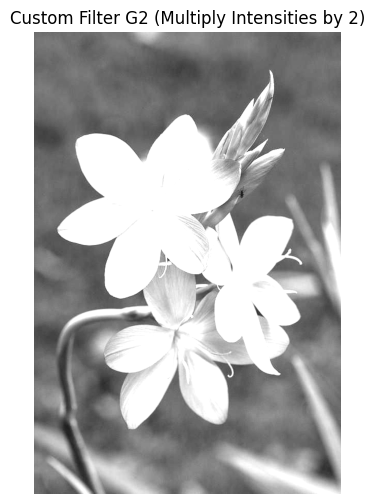

In [15]:
# Custom Filter G2: Multiply image intensities by 2
g2_kernel = np.array([[0, 0, 0], [0, 2, 0], [0, 0, 0]])
g2_filter = cv2.filter2D(gray_image, -1, g2_kernel)
display_image("Custom Filter G2 (Multiply Intensities by 2)", g2_filter)


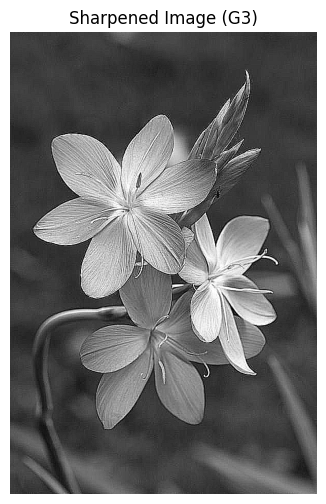

In [16]:

# Custom Filter G3: Sharpening Filter

g3_kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
sharpened_image = cv2.filter2D(gray_image, -1, g3_kernel)
display_image("Sharpened Image (G3)", sharpened_image)


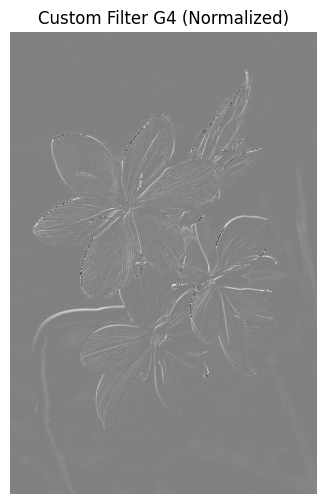

In [17]:

# Custom Filter G4
g4_kernel = np.array([[-1, -1, 0], [-1, 3, 0], [0, 0, 0]])
g4_result = cv2.filter2D(gray_image, -1, g4_kernel)
g4_normalized = cv2.normalize(g4_result, None, 0, 255, cv2.NORM_MINMAX)
g4_normalized += 128  # Add 0.5 to avoid the black result
display_image("Custom Filter G4 (Normalized)", g4_normalized)


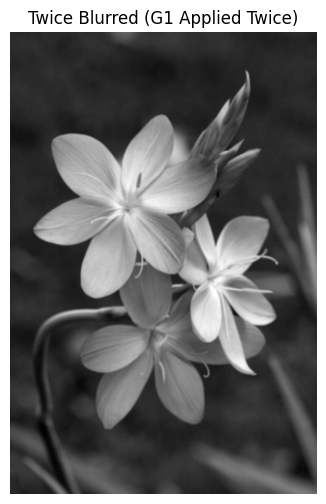

In [18]:

# Applying G1 Twice
twice_blurred = cv2.filter2D(mean_blur, -1, mean_kernel)
display_image("Twice Blurred (G1 Applied Twice)", twice_blurred)



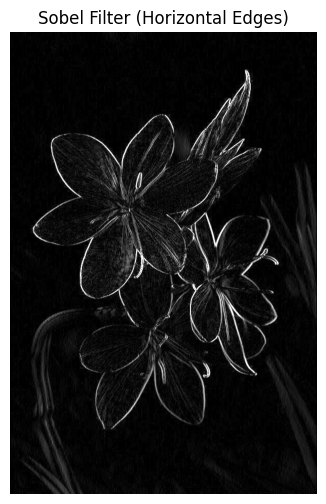

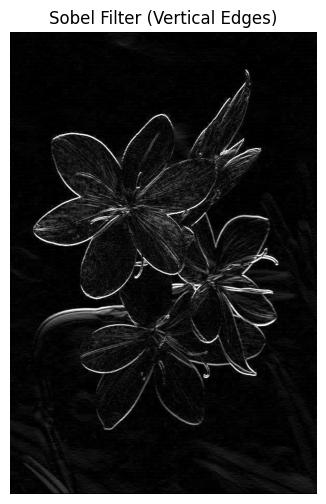

In [19]:
# Sobel Filters
sobel_horizontal = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_horizontal = cv2.convertScaleAbs(sobel_horizontal)
display_image("Sobel Filter (Horizontal Edges)", sobel_horizontal)

sobel_vertical = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_vertical = cv2.convertScaleAbs(sobel_vertical)
display_image("Sobel Filter (Vertical Edges)", sobel_vertical)